###**Predicting Invasive Species (Chain Pickerel, Yellow Perch, White Perch, Brown Bullhead, Smallmouth Bass) presence in Nova Scotia lakes.**

#### This research utilises datasets from Nova Scotia open database and complies important variables from different datasets to build and train various machine learning models to predict the presence of Invasive Species in Nova Scotia lakes. 


###**1. Problem Definition.**
### In this case, the problem is binary classification (a sample can only be one of two things).
 
### This is because using a number of differnet features (pieces of information) about a lake whether Invasive Specie is present or not based on input features.

###**Research Question**

### Given lakes parameters about lakes in Nova Scotia, can we predict whether or not they have Invasive Specie?
###**2. Data**
### The source of the initial data was the Nova Scotia Open database. I've merged two datasets in order to better organise the independent variables. A dependent variable can refer to both independent variables and an objective variable. 

###I use the independent variables to predict our dependent variable. In this case, the independent variables are a lake's various characteristics, and the dependent variable is the presence or absence of Invasive Species.

###**3. Evaluation**
### I might want to define the evaluation metric at the outset of an endeavour. Since machine learning is highly experimental, I could say something like, "I will pursue this project if I can predict with 85% accuracy whether or not a lake contains Invasive Specie during the proof of concept."
 
###This is useful because it provides a general objective for machine learning. Due to the experimental nature of a project, the evaluation metric may evolve over time.

###**4. Features**
### Features are distinct data components. During this stage, I want to begin learning as much as possible about the data. Creating a data dictionary is a common method for accomplishing this.

###**Lake Data Dictionary**
### The following are the features I will use to predict the target variable (Invasive Species is present or not).
##### - Name : Lake Name
##### - Latitude: Coordinates of the lakes
##### - Longitude: Coordinates of the lakes
##### - SURFACE_TEMPERATURE: Recorded temperature at the surface
##### - BOTTOM_TEMPERATURE: Recorded temperature at the bottom
##### - SURFACE_ DISSOLVED_OXYGEN: Recorded dissolved oxygen values 
##### - BOTTOM_DISSOLVED_OXYGEN: Recorded bottom dissolved values
##### - SECCHI_DISC_m: Turbidity of the lake
##### - CONDUCTIVITY_(umho/cm): Conductivity of the lake
##### - HARDNESS_as_CaCO3(mg/L): Concentration of calcium carbonate
##### - ALKALINITY_as_CaCO3(mg/L): 	
##### - pH: 
##### - CHLORIDE(mg/L): 
##### - SODIUM(mg/L): 
##### - Lake Data.SUSPENDED_SOLIDS(mg/L): 	
##### - Present: 

###**- EDA stands for exploratory data analysis, which is the process of learning more about a dataset.**
### - Model training is the process of developing a model or models to learn how to forecast a target variable based on other factors.
### - Model evaluation involves assessing a model's predictions using measures that are specific to the problem at hand.
### - Model comparison: evaluating various models to determine which is best.
### - Model fine-tuning: How can we make a good model even better after we've found it?
### - Feature importance: Given that we're attempting to forecast the presence of invasive fish, are there any features that are particularly crucial for this endeavour?
### - Cross-validation: Can we be certain that a decent model will operate on untested data if we do develop one?
### - Reporting what we've discovered - what would we show someone if we had to submit our work?
### - We'll utilise Scikit-Learn for machine learning and modelling tasks as well as pandas, Matplotlib, and NumPy for data analysis as we move through these subjects.

### - I will work through each stage, and by the end of the notebook, I will have several models that can accurately forecast whether a lake contains Invasive Species or not based on a variety of parameters.
 
### - Additionally, I will be able to describe which parameters are more indicative than others, such as pH, Oxygen Level, and Coordinates.

In [ ]:
import pandas as pd

# Load CSV file into DataFrame
df = pd.read_csv('/content/Nova_Scotia_Freshwater_Fish_Species_Distribution_Records.csv')

# View the resulting DataFrame
df.head()


,COUNTY,NAME,EASTING,NORTHING,CAPTURE DATE,SPECIES COMMON NAME,CAPTURE METHOD NAME,ORIGIN
0,Annapolis,ALMA,"332,331","4,942,630",06/06/1984,Brook Trout,100 ft gill net,Natural Occurrence
1,Annapolis,ALMA,"332,331","4,942,630",06/06/1984,White Perch,100 ft gill net,Natural Occurrence
2,Annapolis,ALMA,"332,331","4,942,630",06/06/1984,Yellow Perch,100 ft gill net,Natural Occurrence
3,Annapolis,ALMA,"332,331","4,942,630",06/06/1984,Brown Bullhead,100 ft gill net,Natural Occurrence
4,Annapolis,ALMA,"332,331","4,942,630",06/06/1984,American Eel,100 ft gill net,Natural Occurrence


In [ ]:
# Drop columns not needed
df.drop(['EASTING', 'NORTHING', 'CAPTURE DATE', 'CAPTURE METHOD NAME', 'COUNTY'], axis=1, inplace=True)

# Rename columns
df.rename(columns={'SPECIES COMMON NAME': 'Species', 'ORIGIN': 'Origin'}, inplace=True)

In [ ]:
# View the resulting DataFrame
df.head()

,NAME,Species,Origin
0,ALMA,Brook Trout,Natural Occurrence
1,ALMA,White Perch,Natural Occurrence
2,ALMA,Yellow Perch,Natural Occurrence
3,ALMA,Brown Bullhead,Natural Occurrence
4,ALMA,American Eel,Natural Occurrence


In [ ]:
df.shape

(5110, 3)

In [ ]:
# Load CSV file for Latitude Longitude info
dfll = pd.read_csv('/content/Latitude and Longitude.csv')

# View the resulting DataFrame
dfll.head()

,latitude,longitude
0,44.61747,-65.113344
1,44.61747,-65.113344
2,44.61747,-65.113344
3,44.61747,-65.113344
4,44.61747,-65.113344


In [ ]:
df.shape

(5110, 3)

In [ ]:
# Merge the DataFrames based on their index
merged_df = pd.merge(df, dfll, left_index=True, right_index=True)

# Display the resulting DataFrame
print(merged_df)

         NAME           Species              Origin   latitude   longitude
0        ALMA       Brook Trout  Natural Occurrence  44.617470  -65.113344
1        ALMA       White Perch  Natural Occurrence  44.617470  -65.113344
2        ALMA      Yellow Perch  Natural Occurrence  44.617470  -65.113344
3        ALMA    Brown Bullhead  Natural Occurrence  44.617470  -65.113344
4        ALMA      American Eel  Natural Occurrence  44.617470  -65.113344
...       ...               ...                 ...        ...         ...
5105  WILSONS       White Perch  Natural Occurrence  43.928559  -65.883312
5106  WILSONS      Yellow Perch  Natural Occurrence  43.928559  -65.883312
5107  WILSONS    Brown Bullhead  Natural Occurrence  43.928559  -65.883312
5108  WILSONS      White Sucker  Natural Occurrence  43.928559  -65.883312
5109  WILSONS  Banded Killifish  Natural Occurrence  43.928559  -65.883312

[5110 rows x 5 columns]


In [ ]:
merged_df.head()

,NAME,Species,Origin,latitude,longitude
0,ALMA,Brook Trout,Natural Occurrence,44.61747,-65.113344
1,ALMA,White Perch,Natural Occurrence,44.61747,-65.113344
2,ALMA,Yellow Perch,Natural Occurrence,44.61747,-65.113344
3,ALMA,Brown Bullhead,Natural Occurrence,44.61747,-65.113344
4,ALMA,American Eel,Natural Occurrence,44.61747,-65.113344


In [ ]:
merged_df.drop_duplicates(subset=['NAME'], keep='first', inplace=True)
merged_df.shape

(833, 5)

In [ ]:
# Export the DataFrame to a CSV file
merged_df.to_csv('output_file.csv', index=False)

In [ ]:
# Load CSV file into DataFrame
dfc = pd.read_csv('/content/Nova_Scotia_Lake_Chemistry_Data.csv')

# View the resulting DataFrame
dfc.head()

,COUNTY,SITE_CODE,LAKE_NAME,STATION,EASTING,NORTHING,TOPO_MAP,MAPBOOK,VOLUME__M3,SURFACE AREA_ha,...,ORGANIC CARBON TOTAL (mg/L),DISSOLVED ORGANIC CARBON (mg/L),CHLOROPHYLL a (mg/m3),PHEOPHYTIN A (mg/m3),LAB,COLLECTOR,AGENCY,DATA_ID,NOTES,ALT_NAME
0,Colchester,10.0,FOLLY,NaN,457386,5043110,11E12,28Z5,NaN,78.9,...,2.3,NaN,1.43,0.50,Nova Scotia Health Authority,bowencw,NS Department of Fisheries & Aquaculture,NaN,NaN,FOLLY Folly R.
1,Colchester,10.0,FOLLY,NaN,457386,5043110,11E12,28Z5,NaN,78.9,...,1.7,NaN,NaN,NaN,Nova Scotia Health Authority,bowencw,NS Department of Fisheries & Aquaculture,NaN,NaN,FOLLY Folly R.
2,Colchester,10.0,FOLLY,NaN,457386,5043110,11E12,28Z5,NaN,78.9,...,NaN,NaN,0.87,0.32,Nova Scotia Health Authority,bowencw,NS Department of Fisheries & Aquaculture,NaN,NaN,FOLLY Folly R.
3,Colchester,10.0,FOLLY,NaN,457386,5043110,11E12,28Z5,NaN,78.9,...,2.0,NaN,NaN,NaN,Nova Scotia Health Authority,bowencw,NS Department of Fisheries & Aquaculture,NaN,NaN,FOLLY Folly R.
4,Cumberland,989.0,HARRISON,NaN,400528,5062440,21H09,27X1,2814528,134.4,...,10.1,NaN,8.45,3.07,Nova Scotia Health Authority,bowencw,NS Department of Fisheries & Aquaculture,NaN,NaN,HARRISON Maccan R.


In [ ]:
dfc.shape

(2557, 61)

In [ ]:
# Drop the specified columns
columns_to_drop = ['COUNTY', 'SITE_CODE', 'STATION', 'EASTING', 'NORTHING', 'TOPO_MAP', 'MAPBOOK', 'VOLUME__M3',
                   'SURFACE AREA_ha', 'MAXIMUM DEPTH_m', 'MEAN DEPTH_m', 'AREA LESS THAN 6M DEEP (ha)',
                   'SHORELINE DEVELOPMENT', 'FLUSHING RATE PER YEAR', 'HEADWATER', 'ASSESSMENT', 'SAMPLE DEPTH (m)',
                   '(JTU)TURBIDITY', 'COLOUR (TCU)', '(UNKNOWN UNITS)COLOUR', '(RELATIVE UNITS) COLOUR',
                   'TOTAL DISSOLVED SOLIDS (mg/L)', 'DISSOLVED ORGANIC CARBON (mg/L)', 'LAB', 'COLLECTOR',
                   'AGENCY', 'DATA_ID', 'NOTES', 'ALT_NAME']
dfc.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
# Display the resulting DataFrame
dfc.head()

,LAKE_NAME,THERMOCLIN,SURFACE TEMPERATURE (°C),BOTTOM TEMPERATURE (°C),SURFACE DISSOLVED OXYGEN (mg/L),BOTTOM DISSOLVED OXYGEN (mg/L),SECCHI_DISC_m,TURBIDITY (NTU),CONDUCTIVITY (umho/cm),HARDNESS as CaCO3 (mg/L),...,TOTAL NITROGEN as N (mg/L),NITRATE+ NITRITE as N (mg/L),AMMONIA as N (mg/L),PHOSPHOROUS TOTAL as P (mg/L),ORTHO PHOSPHOROUS as P (mg/L),SILICA (mg/L),SUSPENDED SOLIDS (mg/L),ORGANIC CARBON TOTAL (mg/L),CHLOROPHYLL a (mg/m3),PHEOPHYTIN A (mg/m3)
0,FOLLY,S,20.5,6.2,13.28,8.40,8.0,0.29,54.5,NaN,...,0.12,0.01,0.01,NaN,NaN,2.1,10.0,2.3,1.43,0.50
1,FOLLY,S,20.5,6.2,13.28,8.40,8.0,0.22,54.5,NaN,...,0.10,0.02,0.01,NaN,NaN,2.4,10.0,1.7,NaN,NaN
2,FOLLY,T,20.5,6.2,13.28,8.40,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.87,0.32
3,FOLLY,B,20.5,6.2,13.28,8.40,8.0,0.91,58.4,6,...,0.31,0.03,0.16,0.009,0.006,3.4,NaN,2.0,NaN,NaN
4,HARRISON,S,20.0,19.7,12.11,12.09,1.2,4.77,52.4,9.6,...,0.35,0.01,0.01,0.021,0.004,1.5,10.0,10.1,8.45,3.07


In [ ]:
# List of column names to exclude which are already float64
exclude_cols = ['LAKE_NAME', 'THERMOCLIN', 'SURFACE TEMPERATURE (°C)', 'BOTTOM TEMPERATURE (°C)', 'SURFACE DISSOLVED OXYGEN (mg/L)', 'BOTTOM DISSOLVED OXYGEN (mg/L)', 'SECCHI_DISC_m', 'TURBIDITY (NTU)', 'ALKALINITY as CaCO3 (mg/L)', 'PH', 'ALUMINUM (mg/L)', 'CALCIUM(mg/L)', 'COPPER (mg/L)', 'IRON (mg/L)', 'MANGANESE (mg/L)', 'POTASSIUM (mg/L)', 'ZINC (mg/L)', 'TOTAL NITROGEN as N (mg/L)', 'NITRATE+ NITRITE as N  (mg/L)', 'AMMONIA as N (mg/L)', 'PHOSPHOROUS TOTAL  as P (mg/L)', 'ORTHO PHOSPHOROUS as P (mg/L)', 'SILICA (mg/L)', 'SUSPENDED SOLIDS (mg/L)', 'ORGANIC CARBON TOTAL (mg/L)', 'CHLOROPHYLL a (mg/m3)', 'PHEOPHYTIN A (mg/m3)']

# Convert columns to float64 type
for col in dfc.columns:
    if col not in exclude_cols:
        dfc[col] = pd.to_numeric(dfc[col], errors='coerce').astype('float64')


In [ ]:
print(dfc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LAKE_NAME                        2557 non-null   object 
 1   THERMOCLIN                       2557 non-null   object 
 2   SURFACE TEMPERATURE (°C)         1879 non-null   float64
 3   BOTTOM TEMPERATURE (°C)          1814 non-null   float64
 4   SURFACE DISSOLVED OXYGEN (mg/L)  1856 non-null   float64
 5   BOTTOM DISSOLVED OXYGEN (mg/L)   1851 non-null   float64
 6   SECCHI_DISC_m                    1814 non-null   float64
 7   TURBIDITY (NTU)                  678 non-null    float64
 8   CONDUCTIVITY (umho/cm)           2238 non-null   float64
 9   HARDNESS as CaCO3 (mg/L)         1008 non-null   float64
 10  ALKALINITY as CaCO3 (mg/L)       1785 non-null   float64
 11  PH                               2456 non-null   float64
 12  ALUMINUM (mg/L)     

In [ ]:
# Replace NaN values with column means
dfc.fillna(dfc.mean(), inplace=True)

In [ ]:
# Display the resulting DataFrame
dfc.head()

,LAKE_NAME,THERMOCLIN,SURFACE TEMPERATURE (°C),BOTTOM TEMPERATURE (°C),SURFACE DISSOLVED OXYGEN (mg/L),BOTTOM DISSOLVED OXYGEN (mg/L),SECCHI_DISC_m,TURBIDITY (NTU),CONDUCTIVITY (umho/cm),HARDNESS as CaCO3 (mg/L),...,TOTAL NITROGEN as N (mg/L),NITRATE+ NITRITE as N (mg/L),AMMONIA as N (mg/L),PHOSPHOROUS TOTAL as P (mg/L),ORTHO PHOSPHOROUS as P (mg/L),SILICA (mg/L),SUSPENDED SOLIDS (mg/L),ORGANIC CARBON TOTAL (mg/L),CHLOROPHYLL a (mg/m3),PHEOPHYTIN A (mg/m3)
0,FOLLY,S,20.5,6.2,13.28,8.40,8.0,0.290000,54.500000,12.830403,...,0.120000,0.010000,0.010000,0.053764,0.035102,2.100000,10.000000,2.30000,1.430000,0.500
1,FOLLY,S,20.5,6.2,13.28,8.40,8.0,0.220000,54.500000,12.830403,...,0.100000,0.020000,0.010000,0.053764,0.035102,2.400000,10.000000,1.70000,4.805636,2.132
2,FOLLY,T,20.5,6.2,13.28,8.40,8.0,2.316357,67.486336,12.830403,...,0.302196,0.027487,0.053384,0.053764,0.035102,1.588593,4.705357,6.01723,0.870000,0.320
3,FOLLY,B,20.5,6.2,13.28,8.40,8.0,0.910000,58.400000,6.000000,...,0.310000,0.030000,0.160000,0.009000,0.006000,3.400000,4.705357,2.00000,4.805636,2.132
4,HARRISON,S,20.0,19.7,12.11,12.09,1.2,4.770000,52.400000,9.600000,...,0.350000,0.010000,0.010000,0.021000,0.004000,1.500000,10.000000,10.10000,8.450000,3.070


In [ ]:
#dfc.drop_duplicates(subset=['LAKE_NAME'], keep='first', inplace=True)

In [ ]:
dfc = dfc.rename(columns={'LAKE_NAME': 'NAME'})

In [ ]:
# Display the resulting DataFrame
dfc.head()

,NAME,THERMOCLIN,SURFACE TEMPERATURE (°C),BOTTOM TEMPERATURE (°C),SURFACE DISSOLVED OXYGEN (mg/L),BOTTOM DISSOLVED OXYGEN (mg/L),SECCHI_DISC_m,TURBIDITY (NTU),CONDUCTIVITY (umho/cm),HARDNESS as CaCO3 (mg/L),...,TOTAL NITROGEN as N (mg/L),NITRATE+ NITRITE as N (mg/L),AMMONIA as N (mg/L),PHOSPHOROUS TOTAL as P (mg/L),ORTHO PHOSPHOROUS as P (mg/L),SILICA (mg/L),SUSPENDED SOLIDS (mg/L),ORGANIC CARBON TOTAL (mg/L),CHLOROPHYLL a (mg/m3),PHEOPHYTIN A (mg/m3)
0,FOLLY,S,20.5,6.2,13.28,8.40,8.0,0.290000,54.500000,12.830403,...,0.120000,0.010000,0.010000,0.053764,0.035102,2.100000,10.000000,2.30000,1.430000,0.500
1,FOLLY,S,20.5,6.2,13.28,8.40,8.0,0.220000,54.500000,12.830403,...,0.100000,0.020000,0.010000,0.053764,0.035102,2.400000,10.000000,1.70000,4.805636,2.132
2,FOLLY,T,20.5,6.2,13.28,8.40,8.0,2.316357,67.486336,12.830403,...,0.302196,0.027487,0.053384,0.053764,0.035102,1.588593,4.705357,6.01723,0.870000,0.320
3,FOLLY,B,20.5,6.2,13.28,8.40,8.0,0.910000,58.400000,6.000000,...,0.310000,0.030000,0.160000,0.009000,0.006000,3.400000,4.705357,2.00000,4.805636,2.132
4,HARRISON,S,20.0,19.7,12.11,12.09,1.2,4.770000,52.400000,9.600000,...,0.350000,0.010000,0.010000,0.021000,0.004000,1.500000,10.000000,10.10000,8.450000,3.070


In [ ]:
dfc.shape

(2557, 32)

In [ ]:
merged_new = pd.merge(merged_df, dfc, on='NAME', how='inner')

In [ ]:
# Display the resulting DataFrame
merged_new.head()

,NAME,Species,Origin,latitude,longitude,THERMOCLIN,SURFACE TEMPERATURE (°C),BOTTOM TEMPERATURE (°C),SURFACE DISSOLVED OXYGEN (mg/L),BOTTOM DISSOLVED OXYGEN (mg/L),...,TOTAL NITROGEN as N (mg/L),NITRATE+ NITRITE as N (mg/L),AMMONIA as N (mg/L),PHOSPHOROUS TOTAL as P (mg/L),ORTHO PHOSPHOROUS as P (mg/L),SILICA (mg/L),SUSPENDED SOLIDS (mg/L),ORGANIC CARBON TOTAL (mg/L),CHLOROPHYLL a (mg/m3),PHEOPHYTIN A (mg/m3)
0,ALMA,Brook Trout,Natural Occurrence,44.61747,-65.113344,S,21.13289,14.294432,8.410426,5.160756,...,0.190000,0.010,0.010,0.007000,0.0020,1.000000,4.705357,6.70000,4.000000,2.132
1,ALMA,Brook Trout,Natural Occurrence,44.61747,-65.113344,B,21.13289,14.294432,8.410426,5.160756,...,0.530000,0.010,0.160,0.070000,0.0400,5.400000,4.705357,12.00000,4.805636,2.132
2,ALMA,Brook Trout,Natural Occurrence,44.61747,-65.113344,S,20.00000,9.000000,9.000000,9.200000,...,0.302196,0.025,0.025,0.053764,0.0050,1.588593,4.705357,4.60000,4.805636,2.132
3,ALMA,Brook Trout,Natural Occurrence,44.61747,-65.113344,S,18.20000,15.200000,9.000000,8.000000,...,0.200000,0.005,0.005,0.005000,0.0005,1.588593,4.705357,6.01723,4.805636,2.132
4,ALMA,Brook Trout,Natural Occurrence,44.61747,-65.113344,B,18.20000,15.200000,9.000000,8.000000,...,0.200000,0.005,0.005,0.004000,0.0005,1.588593,4.705357,6.01723,4.805636,2.132


In [ ]:
merged_new.shape

(2153, 36)

In [ ]:
merged_new = merged_new.rename(columns={'Origin': 'Present'})
cols = merged_new.columns.tolist()
cols.remove('Present')
cols.append('Present')
merged_new = merged_new[cols]

In [ ]:
# Display the resulting DataFrame
merged_new.head()

,NAME,Species,latitude,longitude,THERMOCLIN,SURFACE TEMPERATURE (°C),BOTTOM TEMPERATURE (°C),SURFACE DISSOLVED OXYGEN (mg/L),BOTTOM DISSOLVED OXYGEN (mg/L),SECCHI_DISC_m,...,NITRATE+ NITRITE as N (mg/L),AMMONIA as N (mg/L),PHOSPHOROUS TOTAL as P (mg/L),ORTHO PHOSPHOROUS as P (mg/L),SILICA (mg/L),SUSPENDED SOLIDS (mg/L),ORGANIC CARBON TOTAL (mg/L),CHLOROPHYLL a (mg/m3),PHEOPHYTIN A (mg/m3),Present
0,ALMA,Brook Trout,44.61747,-65.113344,S,21.13289,14.294432,8.410426,5.160756,2.954909,...,0.010,0.010,0.007000,0.0020,1.000000,4.705357,6.70000,4.000000,2.132,Natural Occurrence
1,ALMA,Brook Trout,44.61747,-65.113344,B,21.13289,14.294432,8.410426,5.160756,2.954909,...,0.010,0.160,0.070000,0.0400,5.400000,4.705357,12.00000,4.805636,2.132,Natural Occurrence
2,ALMA,Brook Trout,44.61747,-65.113344,S,20.00000,9.000000,9.000000,9.200000,3.000000,...,0.025,0.025,0.053764,0.0050,1.588593,4.705357,4.60000,4.805636,2.132,Natural Occurrence
3,ALMA,Brook Trout,44.61747,-65.113344,S,18.20000,15.200000,9.000000,8.000000,1.750000,...,0.005,0.005,0.005000,0.0005,1.588593,4.705357,6.01723,4.805636,2.132,Natural Occurrence
4,ALMA,Brook Trout,44.61747,-65.113344,B,18.20000,15.200000,9.000000,8.000000,1.750000,...,0.005,0.005,0.004000,0.0005,1.588593,4.705357,6.01723,4.805636,2.132,Natural Occurrence


In [ ]:
# Create a function to check if a species is invasive or not
def check_invasive(species):
    invasive_species = ["Chain Pickerel", "Yellow Perch", "White Perch", "Brown Bullhead", "Smallmouth Bass"]
    if species in invasive_species:
        return "1"
    else:
        return "0"

# Apply the check_invasive function to the "Species" column and create a new "Fish Type" column
merged_new["Invasive Fish"] = merged_new["Species"].apply(check_invasive)

In [ ]:
merged_new.head()

,NAME,Species,latitude,longitude,THERMOCLIN,SURFACE TEMPERATURE (°C),BOTTOM TEMPERATURE (°C),SURFACE DISSOLVED OXYGEN (mg/L),BOTTOM DISSOLVED OXYGEN (mg/L),SECCHI_DISC_m,...,AMMONIA as N (mg/L),PHOSPHOROUS TOTAL as P (mg/L),ORTHO PHOSPHOROUS as P (mg/L),SILICA (mg/L),SUSPENDED SOLIDS (mg/L),ORGANIC CARBON TOTAL (mg/L),CHLOROPHYLL a (mg/m3),PHEOPHYTIN A (mg/m3),Present,Invasive Fish
0,ALMA,Brook Trout,44.61747,-65.113344,S,21.13289,14.294432,8.410426,5.160756,2.954909,...,0.010,0.007000,0.0020,1.000000,4.705357,6.70000,4.000000,2.132,Natural Occurrence,0
1,ALMA,Brook Trout,44.61747,-65.113344,B,21.13289,14.294432,8.410426,5.160756,2.954909,...,0.160,0.070000,0.0400,5.400000,4.705357,12.00000,4.805636,2.132,Natural Occurrence,0
2,ALMA,Brook Trout,44.61747,-65.113344,S,20.00000,9.000000,9.000000,9.200000,3.000000,...,0.025,0.053764,0.0050,1.588593,4.705357,4.60000,4.805636,2.132,Natural Occurrence,0
3,ALMA,Brook Trout,44.61747,-65.113344,S,18.20000,15.200000,9.000000,8.000000,1.750000,...,0.005,0.005000,0.0005,1.588593,4.705357,6.01723,4.805636,2.132,Natural Occurrence,0
4,ALMA,Brook Trout,44.61747,-65.113344,B,18.20000,15.200000,9.000000,8.000000,1.750000,...,0.005,0.004000,0.0005,1.588593,4.705357,6.01723,4.805636,2.132,Natural Occurrence,0


In [ ]:
merged_new.tail()

,NAME,Species,latitude,longitude,THERMOCLIN,SURFACE TEMPERATURE (°C),BOTTOM TEMPERATURE (°C),SURFACE DISSOLVED OXYGEN (mg/L),BOTTOM DISSOLVED OXYGEN (mg/L),SECCHI_DISC_m,...,AMMONIA as N (mg/L),PHOSPHOROUS TOTAL as P (mg/L),ORTHO PHOSPHOROUS as P (mg/L),SILICA (mg/L),SUSPENDED SOLIDS (mg/L),ORGANIC CARBON TOTAL (mg/L),CHLOROPHYLL a (mg/m3),PHEOPHYTIN A (mg/m3),Present,Invasive Fish
2148,WELLINGTON,Brook Trout,43.949981,-66.083338,S,21.13289,14.294432,8.410426,5.160756,2.954909,...,0.005,0.006,0.003,1.588593,4.705357,8.7,4.805636,2.132,Natural Occurrence,0
2149,WELLINGTON,Brook Trout,43.949981,-66.083338,T,21.13289,14.294432,8.410426,5.160756,2.954909,...,0.005,0.009,0.002,1.588593,4.705357,10.0,4.805636,2.132,Natural Occurrence,0
2150,WELLINGTON,Brook Trout,43.949981,-66.083338,B,21.13289,14.294432,8.410426,5.160756,2.954909,...,0.090,0.019,0.003,1.588593,4.705357,11.0,4.805636,2.132,Natural Occurrence,0
2151,WELLINGTON,Brook Trout,43.949981,-66.083338,S,20.10000,13.300000,8.000000,3.000000,1.400000,...,0.005,0.006,0.001,1.588593,4.705357,8.7,4.805636,2.132,Natural Occurrence,0
2152,WELLINGTON,Brook Trout,43.949981,-66.083338,B,20.10000,13.300000,8.000000,3.000000,1.400000,...,0.190,0.019,0.005,1.588593,4.705357,11.0,4.805636,2.132,Natural Occurrence,0


In [ ]:
merged_new.shape

(2153, 37)

In [ ]:
# drop the "Species" and "Present" columns and create a new DataFrame
df_final = merged_new.drop(["Species", "Present"], axis=1)

In [ ]:
df_final.head()

,NAME,latitude,longitude,THERMOCLIN,SURFACE TEMPERATURE (°C),BOTTOM TEMPERATURE (°C),SURFACE DISSOLVED OXYGEN (mg/L),BOTTOM DISSOLVED OXYGEN (mg/L),SECCHI_DISC_m,TURBIDITY (NTU),...,NITRATE+ NITRITE as N (mg/L),AMMONIA as N (mg/L),PHOSPHOROUS TOTAL as P (mg/L),ORTHO PHOSPHOROUS as P (mg/L),SILICA (mg/L),SUSPENDED SOLIDS (mg/L),ORGANIC CARBON TOTAL (mg/L),CHLOROPHYLL a (mg/m3),PHEOPHYTIN A (mg/m3),Invasive Fish
0,ALMA,44.61747,-65.113344,S,21.13289,14.294432,8.410426,5.160756,2.954909,0.830000,...,0.010,0.010,0.007000,0.0020,1.000000,4.705357,6.70000,4.000000,2.132,0
1,ALMA,44.61747,-65.113344,B,21.13289,14.294432,8.410426,5.160756,2.954909,5.610000,...,0.010,0.160,0.070000,0.0400,5.400000,4.705357,12.00000,4.805636,2.132,0
2,ALMA,44.61747,-65.113344,S,20.00000,9.000000,9.000000,9.200000,3.000000,0.850000,...,0.025,0.025,0.053764,0.0050,1.588593,4.705357,4.60000,4.805636,2.132,0
3,ALMA,44.61747,-65.113344,S,18.20000,15.200000,9.000000,8.000000,1.750000,2.316357,...,0.005,0.005,0.005000,0.0005,1.588593,4.705357,6.01723,4.805636,2.132,0
4,ALMA,44.61747,-65.113344,B,18.20000,15.200000,9.000000,8.000000,1.750000,2.316357,...,0.005,0.005,0.004000,0.0005,1.588593,4.705357,6.01723,4.805636,2.132,0


In [ ]:
# convert "THERMOCLIN" column to numeric factor variable
df_final["THERMOCLIN"] = pd.factorize(df_final["THERMOCLIN"])[0]

In [ ]:
df_final.head()

,NAME,latitude,longitude,THERMOCLIN,SURFACE TEMPERATURE (°C),BOTTOM TEMPERATURE (°C),SURFACE DISSOLVED OXYGEN (mg/L),BOTTOM DISSOLVED OXYGEN (mg/L),SECCHI_DISC_m,TURBIDITY (NTU),...,NITRATE+ NITRITE as N (mg/L),AMMONIA as N (mg/L),PHOSPHOROUS TOTAL as P (mg/L),ORTHO PHOSPHOROUS as P (mg/L),SILICA (mg/L),SUSPENDED SOLIDS (mg/L),ORGANIC CARBON TOTAL (mg/L),CHLOROPHYLL a (mg/m3),PHEOPHYTIN A (mg/m3),Invasive Fish
0,ALMA,44.61747,-65.113344,0,21.13289,14.294432,8.410426,5.160756,2.954909,0.830000,...,0.010,0.010,0.007000,0.0020,1.000000,4.705357,6.70000,4.000000,2.132,0
1,ALMA,44.61747,-65.113344,1,21.13289,14.294432,8.410426,5.160756,2.954909,5.610000,...,0.010,0.160,0.070000,0.0400,5.400000,4.705357,12.00000,4.805636,2.132,0
2,ALMA,44.61747,-65.113344,0,20.00000,9.000000,9.000000,9.200000,3.000000,0.850000,...,0.025,0.025,0.053764,0.0050,1.588593,4.705357,4.60000,4.805636,2.132,0
3,ALMA,44.61747,-65.113344,0,18.20000,15.200000,9.000000,8.000000,1.750000,2.316357,...,0.005,0.005,0.005000,0.0005,1.588593,4.705357,6.01723,4.805636,2.132,0
4,ALMA,44.61747,-65.113344,1,18.20000,15.200000,9.000000,8.000000,1.750000,2.316357,...,0.005,0.005,0.004000,0.0005,1.588593,4.705357,6.01723,4.805636,2.132,0


In [ ]:
# find unique values of "THERMOCLIN" column
df_final["THERMOCLIN"].unique()

# print the unique values
#print(thermoclin_unique)

array([0, 1, 2])

# Machine Learning Model

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Installing the required libraries

# Import all the tools we need




#Regular EDA and plotting libraries

import matplotlib.pyplot as plt

import seaborn as sns

!pip install scikit-learn


# Models from Scikit-Learn

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier


# Model Evaluations

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import roc_curve, auc

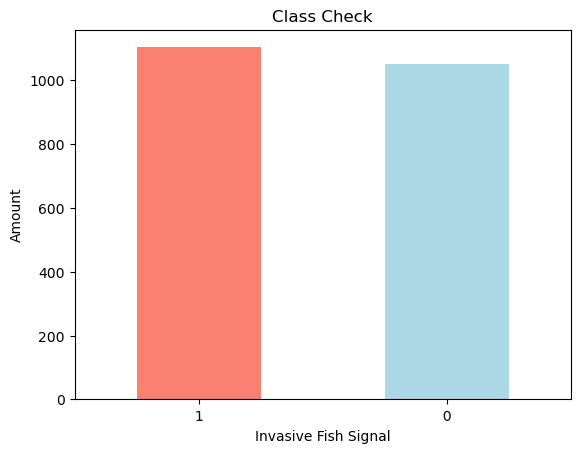

In [ ]:

# Let's see how many positive (1) and negative (0) samples we have in our dataframe
class_counts = df_final['Invasive Fish'].value_counts()

# Plot the value counts with a bar graph
ax = class_counts.plot(kind="bar", color=["salmon", "lightblue"])

# Add title to the plot
plt.title("Class Check")
plt.xlabel("Invasive Fish Signal")
plt.ylabel("Amount")
#plt.legend(['Not Present','Present']);
plt.xticks(rotation = 2)

# Show the plot
plt.show()


In [ ]:
# Checking summary statistics of dataframe

df_final.describe()

,latitude,longitude,THERMOCLIN,SURFACE TEMPERATURE (°C),BOTTOM TEMPERATURE (°C),SURFACE DISSOLVED OXYGEN (mg/L),BOTTOM DISSOLVED OXYGEN (mg/L),SECCHI_DISC_m,TURBIDITY (NTU),CONDUCTIVITY (umho/cm),...,TOTAL NITROGEN as N (mg/L),NITRATE+ NITRITE as N (mg/L),AMMONIA as N (mg/L),PHOSPHOROUS TOTAL as P (mg/L),ORTHO PHOSPHOROUS as P (mg/L),SILICA (mg/L),SUSPENDED SOLIDS (mg/L),ORGANIC CARBON TOTAL (mg/L),CHLOROPHYLL a (mg/m3),PHEOPHYTIN A (mg/m3)
count,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,...,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000
mean,44.808341,-63.883392,0.359034,21.221927,14.343512,8.446307,5.160859,2.996833,2.371232,64.256431,...,0.303007,0.026395,0.055663,0.056654,0.037997,1.594802,4.752147,5.969751,4.904202,2.132556
std,0.587491,1.666514,0.640728,2.926204,4.350721,1.347764,2.765942,1.507851,2.945556,78.740838,...,0.555230,0.057994,0.204536,0.280532,0.224301,0.656731,1.629610,2.402774,4.231631,0.778392
min,43.597834,-66.144195,0.000000,0.800000,3.500000,0.000000,0.000000,0.100000,0.050000,5.800000,...,0.008000,0.001000,0.002500,0.000500,0.000500,0.050000,0.150000,0.250000,0.050000,0.010000
25%,44.350564,-65.281584,0.000000,20.600000,12.000000,8.000000,3.200000,2.050000,2.316357,29.100000,...,0.210000,0.005000,0.007000,0.005000,0.001000,1.588593,4.705357,5.600000,4.805636,2.132000
50%,44.746224,-63.877922,0.000000,21.132890,14.294432,8.410426,5.160756,2.954909,2.316357,44.000000,...,0.302196,0.025000,0.030000,0.040000,0.005000,1.588593,4.705357,6.017230,4.805636,2.132000
75%,45.141837,-62.864560,1.000000,22.800000,17.000000,9.000000,7.000000,3.500000,2.316357,67.486336,...,0.302196,0.027487,0.053384,0.053764,0.035102,1.588593,4.705357,6.017230,4.805636,2.132000
max,46.869400,-59.916622,2.000000,28.700000,28.000000,16.000000,13.000000,12.000000,71.000000,900.000000,...,22.500000,1.600000,4.520000,5.200000,4.060000,6.800000,25.000000,31.800000,90.000000,28.000000


In [ ]:
df_final['Invasive Fish'] = df_final['Invasive Fish'].astype(int)


(34.5, -0.5)

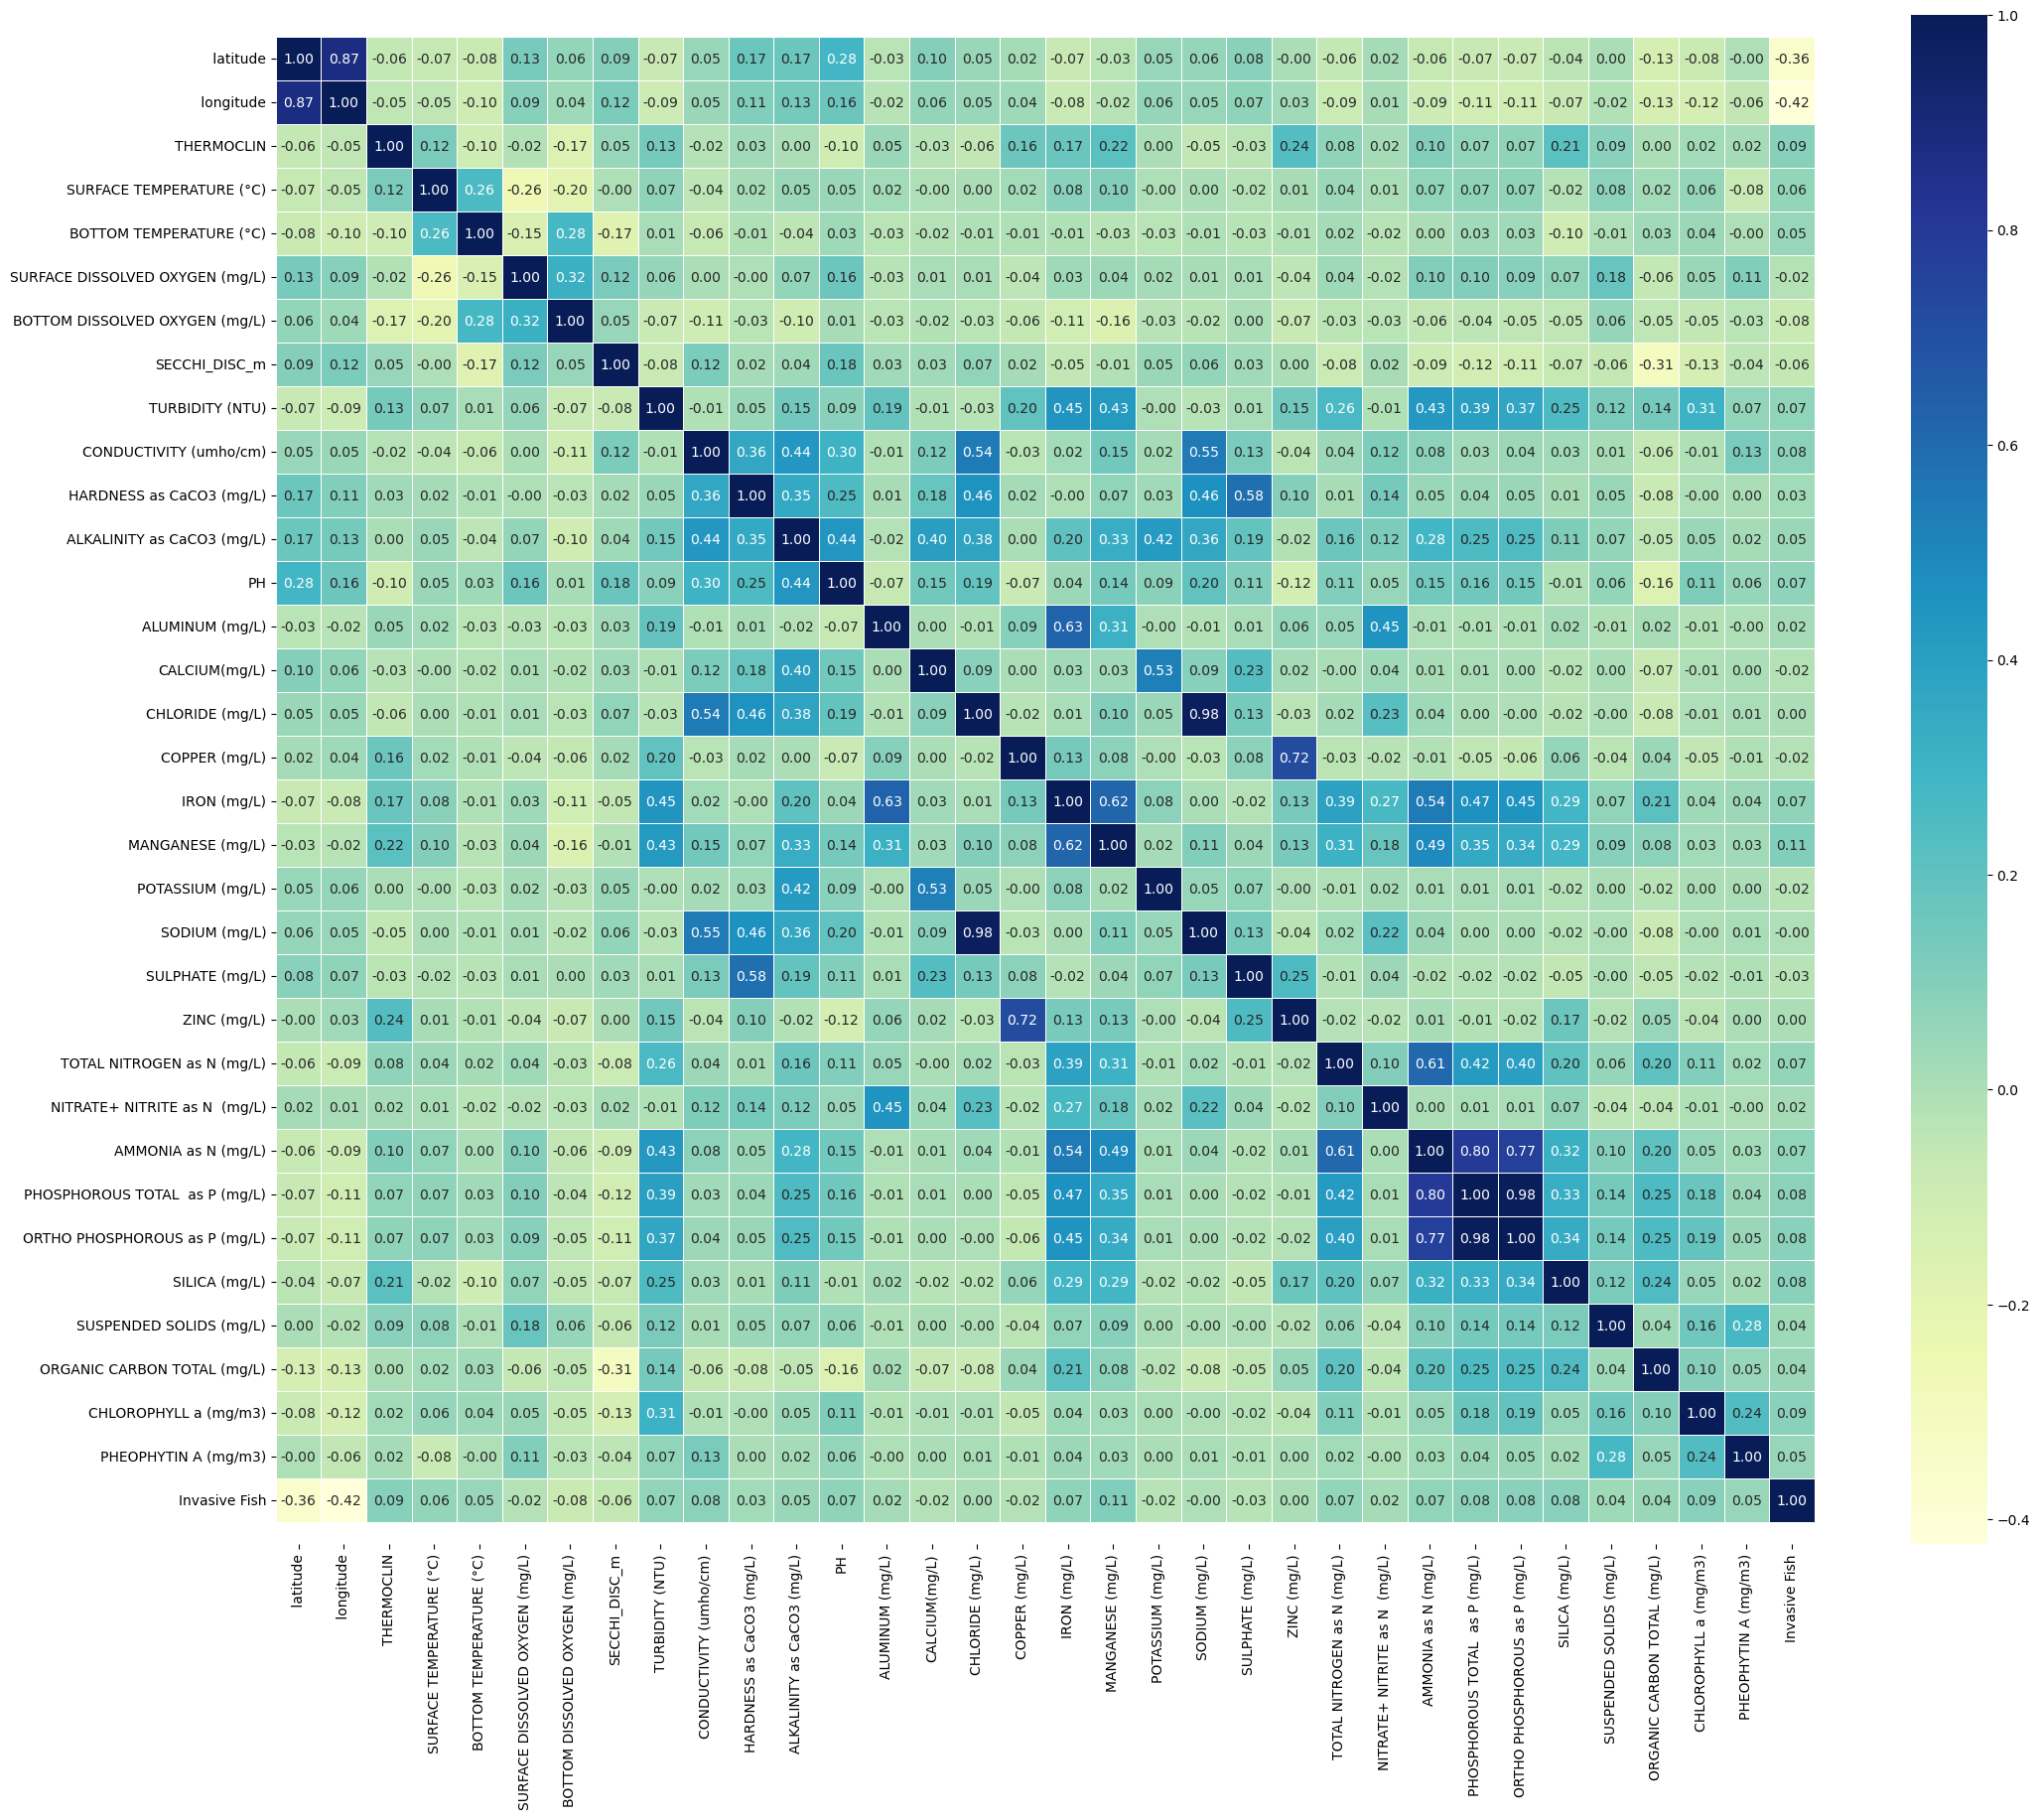

In [ ]:
# Find the correlation between our independent variables

corr_matrix = df_final.corr()

fig, ax = plt.subplots(figsize=(25, 20))

sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
# Visualizing Invasive Fish presence

!pip install folium


In [ ]:
import folium

# Create the base map with the center at the coordinates you want
m = folium.Map(location=[44.6923, -62.6572], zoom_start=7.5)

# Add markers for each data point in the dataframe
for index, row in df_final.iterrows():
    if row['Invasive Fish'] == 1:
        marker_color = 'red'
    elif row['Invasive Fish'] == 0:
        marker_color = 'blue'
    else:
        marker_color = 'green'
        
    # Add a circle marker to the map
    folium.CircleMarker(location=[row[' latitude'], row[' longitude']],
                        radius=8,
                        color=marker_color,
                        fill=True,
                        fill_color=marker_color).add_to(m)

# Display the map
m

In [ ]:
df_final.columns

Index(['NAME', ' latitude', ' longitude', 'THERMOCLIN',
       'SURFACE TEMPERATURE (°C)', 'BOTTOM TEMPERATURE (°C)',
       'SURFACE DISSOLVED OXYGEN (mg/L)', 'BOTTOM DISSOLVED OXYGEN (mg/L)',
       'SECCHI_DISC_m', 'TURBIDITY (NTU)', 'CONDUCTIVITY (umho/cm)',
       'HARDNESS as CaCO3 (mg/L)', 'ALKALINITY as CaCO3 (mg/L)', 'PH',
       'ALUMINUM (mg/L)', 'CALCIUM(mg/L)', 'CHLORIDE (mg/L)', 'COPPER (mg/L)',
       'IRON (mg/L)', 'MANGANESE (mg/L)', 'POTASSIUM (mg/L)', 'SODIUM (mg/L)',
       'SULPHATE (mg/L)', 'ZINC (mg/L)', 'TOTAL NITROGEN as N (mg/L)',
       'NITRATE+ NITRITE as N  (mg/L)', 'AMMONIA as N (mg/L)',
       'PHOSPHOROUS TOTAL  as P (mg/L)', 'ORTHO PHOSPHOROUS as P (mg/L)',
       'SILICA (mg/L)', 'SUSPENDED SOLIDS (mg/L)',
       'ORGANIC CARBON TOTAL (mg/L)', 'CHLOROPHYLL a (mg/m3)',
       'PHEOPHYTIN A (mg/m3)', 'Invasive Fish'],
      dtype='object')

In [ ]:
df_final['Invasive Fish'].unique()


array([0, 1])

In [ ]:
df_final = df_final.drop('NAME', axis=1)


In [ ]:
# Split the dataset into X (features) and y (target)
X = df_final.drop('Invasive Fish', axis=1)
Y = df_final['Invasive Fish']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [ ]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    Y_train : labels associated with training data
    Y_test : labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(50)

    # Make a list to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
    
    #Fit the model to the data
        model.fit(X_train, Y_train)
        
    #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             Y_train=Y_train,
                             Y_test=Y_test)
model_scores

{'KNN': 0.6635730858468677,
 'Logistic Regression': 0.7563805104408353,
 'Random Forest': 0.8375870069605569}

<Figure size 800x600 with 0 Axes>

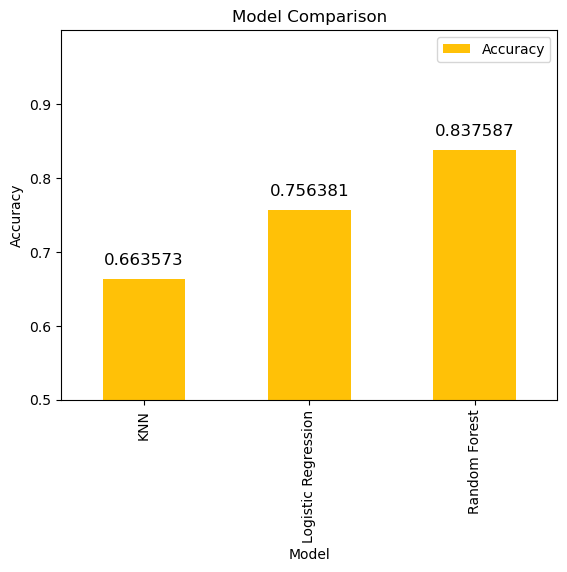

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])

plt.figure(figsize=(8, 6))

# Set bar color
colors = ['#FFC107', '#03A9F4', '#4CAF50']

# Plot the bar chart
ax = model_compare.T.plot(kind='bar', color=colors)

# Set plot title, x-label, and y-label
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Set y-axis range and tick marks
plt.ylim(0.5, 1.0)
plt.yticks(np.arange(0.5, 1.0, 0.1))

# Display the legend
plt.legend(loc='upper right')

# Remove top and right spines
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

# Add value labels to each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12, padding=8)

plt.show()


In [ ]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

 longitude                         0.189641
 latitude                          0.124909
CONDUCTIVITY (umho/cm)             0.055090
PH                                 0.049566
SURFACE TEMPERATURE (°C)           0.046724
SECCHI_DISC_m                      0.045407
BOTTOM TEMPERATURE (°C)            0.039861
BOTTOM DISSOLVED OXYGEN (mg/L)     0.032902
SODIUM (mg/L)                      0.032415
SURFACE DISSOLVED OXYGEN (mg/L)    0.029234
ALKALINITY as CaCO3 (mg/L)         0.027027
CALCIUM(mg/L)                      0.026910
POTASSIUM (mg/L)                   0.026239
CHLORIDE (mg/L)                    0.025922
HARDNESS as CaCO3 (mg/L)           0.024434
SULPHATE (mg/L)                    0.021980
TOTAL NITROGEN as N (mg/L)         0.020126
MANGANESE (mg/L)                   0.019975
ALUMINUM (mg/L)                    0.019858
IRON (mg/L)                        0.018623
ORGANIC CARBON TOTAL (mg/L)        0.018175
PHOSPHOROUS TOTAL  as P (mg/L)     0.017722
TURBIDITY (NTU)                 

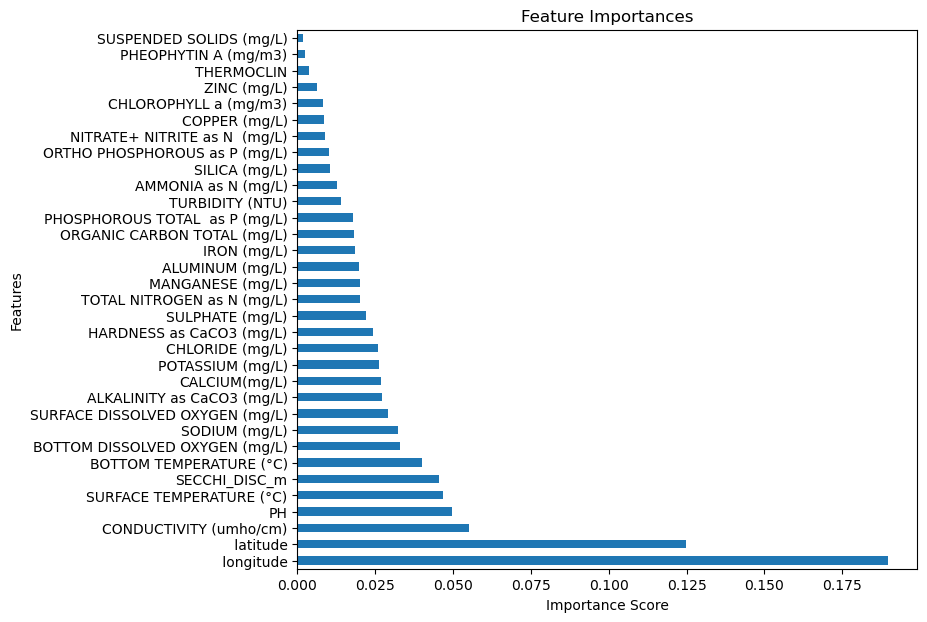

In [ ]:
# Set the figure size

plt.figure(figsize=(8, 7))

# Create a horizontal bar graph of feature importances

feature_scores.plot(kind='barh')

# Set the title and axis labels

plt.title('Feature Importances')

plt.xlabel('Importance Score')

plt.ylabel('Features')


# Show the plot

plt.show()